In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

<AxesSubplot:>

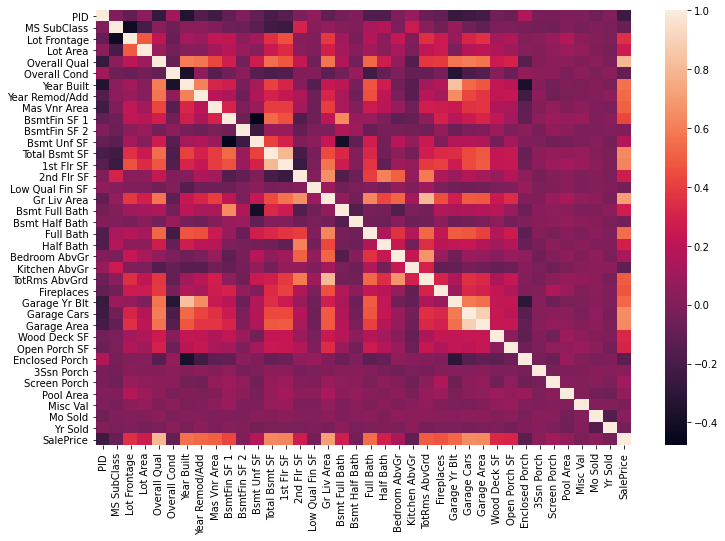

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())


In [7]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Figure size 1080x1080 with 0 Axes>

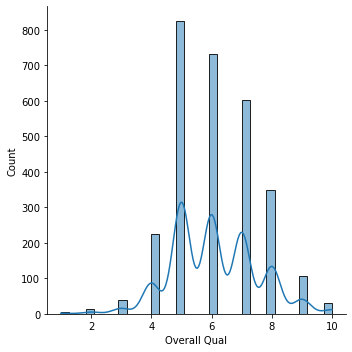

In [8]:
plt.figure(figsize=(15,15))
sns.displot(df['Overall Qual'],kde=True)
plt.show()


<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

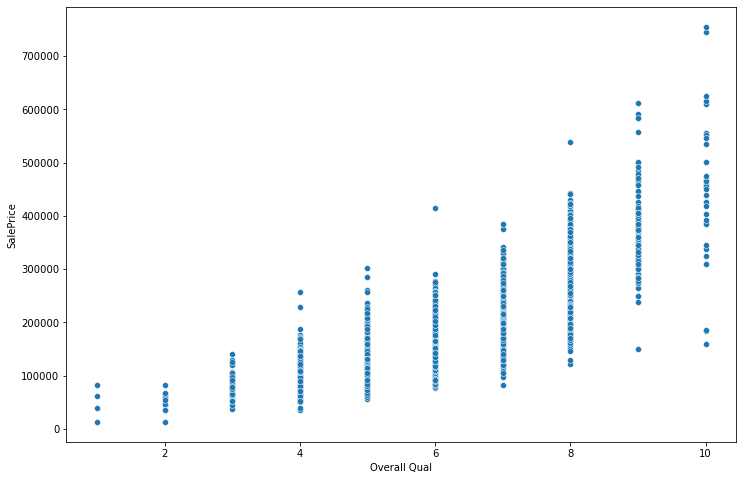

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Overall Qual', y ='SalePrice',data=df)

In [10]:
df[(df['Overall Qual']>8)&(df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<AxesSubplot:xlabel='Overall Qual'>

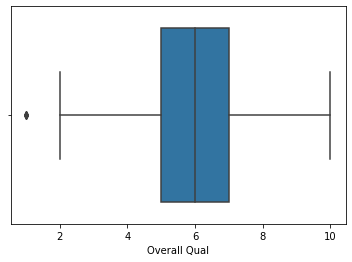

In [11]:
sns.boxplot(x='Overall Qual',whis=1.5, data=df)

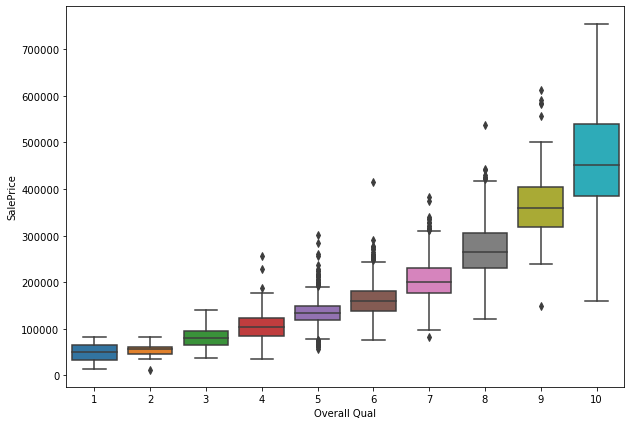

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='Overall Qual',y='SalePrice', whis=1.5)
plt.show()

In [13]:
df[df['Overall Qual']<2].index

Int64Index([765, 1553, 1901, 2903], dtype='int64')

In [14]:
OverallQual_drop = df[df['Overall Qual']<2].index

In [15]:
OverallQual_drop

Int64Index([765, 1553, 1901, 2903], dtype='int64')

In [16]:
df = df.drop(OverallQual_drop)

<AxesSubplot:xlabel='Overall Qual'>

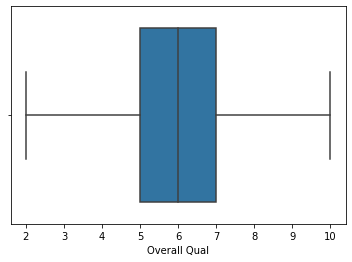

In [17]:
sns.boxplot(x='Overall Qual',whis=1.5, data=df)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

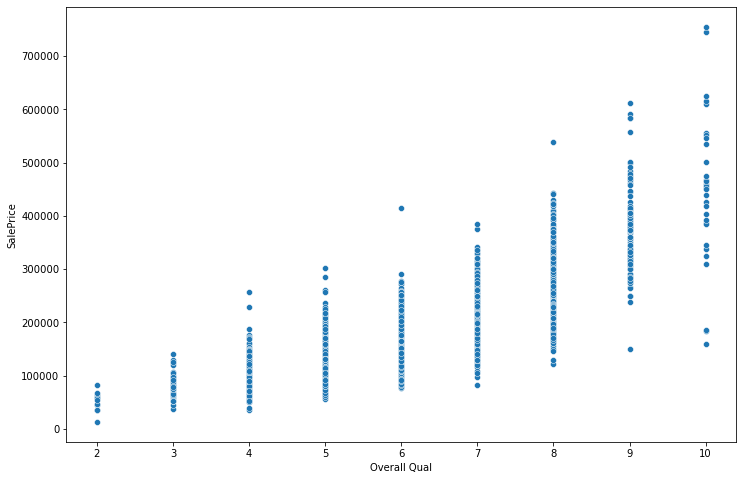

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Overall Qual', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

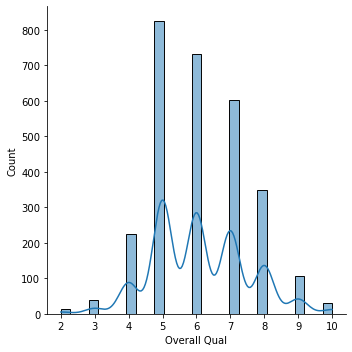

In [19]:
plt.figure(figsize=(15,15))
sns.displot(df['Overall Qual'],kde=True)
plt.show()

In [20]:
df.corr()['SalePrice'].sort_values()

PID               -0.246023
Enclosed Porch    -0.129030
Kitchen AbvGr     -0.120520
Overall Cond      -0.107259
MS SubClass       -0.087163
Low Qual Fin SF   -0.037962
Bsmt Half Bath    -0.036472
Yr Sold           -0.031002
Misc Val          -0.015925
BsmtFin SF 2       0.005237
3Ssn Porch         0.032054
Mo Sold            0.032288
Pool Area          0.068394
Screen Porch       0.111729
Bedroom AbvGr      0.141285
Bsmt Unf SF        0.180874
2nd Flr SF         0.268236
Lot Area           0.268571
Bsmt Full Bath     0.275854
Half Bath          0.285974
Open Porch SF      0.312069
Wood Deck SF       0.326221
Lot Frontage       0.359378
BsmtFin SF 1       0.432162
Fireplaces         0.473662
TotRms AbvGrd      0.493778
Mas Vnr Area       0.508094
Garage Yr Blt      0.526479
Year Remod/Add     0.531317
Full Bath          0.544455
Year Built         0.557821
1st Flr SF         0.621744
Total Bsmt SF      0.630819
Garage Area        0.639984
Garage Cars        0.647642
Gr Liv Area        0

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

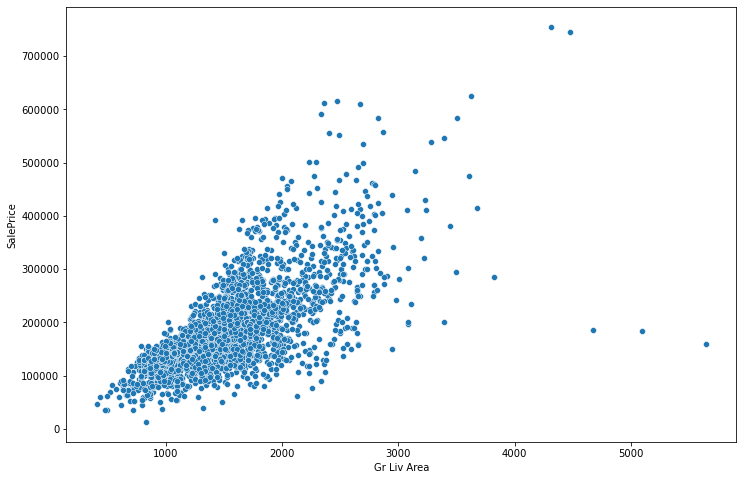

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

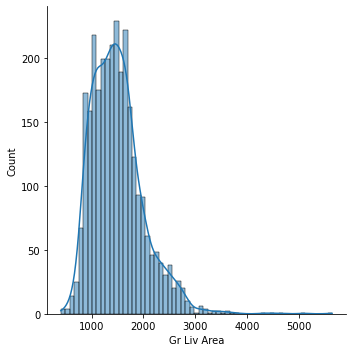

In [22]:
plt.figure(figsize=(15,15))
sns.displot(x = df['Gr Liv Area'],kde=True)
plt.show()

<AxesSubplot:xlabel='Gr Liv Area'>

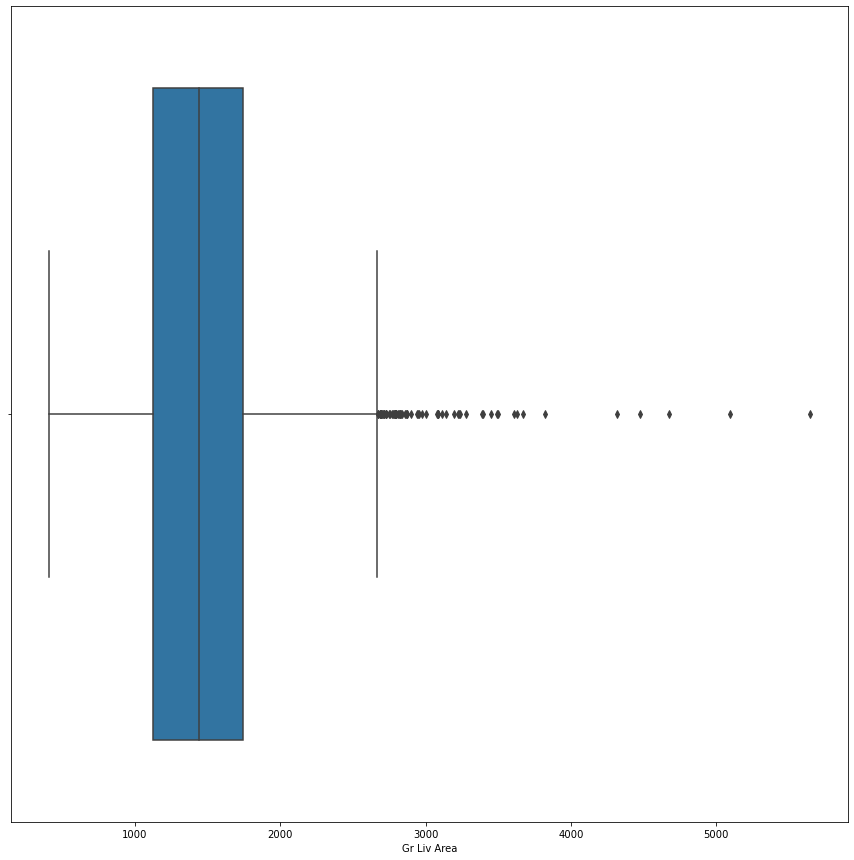

In [23]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Gr Liv Area',whis=1.5)

In [24]:
df[(df['Gr Liv Area']>4000)&((df['SalePrice']>65000))]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1760,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1767,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [25]:
df[(df['Gr Liv Area']>4000)&(df['SalePrice']>65000)].index

Int64Index([1498, 1760, 1767, 2180, 2181], dtype='int64')

In [26]:
Gr_liv_area = df[(df['Gr Liv Area']>4000)&(df['SalePrice']>65000)].index

In [27]:
df = df.drop(Gr_liv_area)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

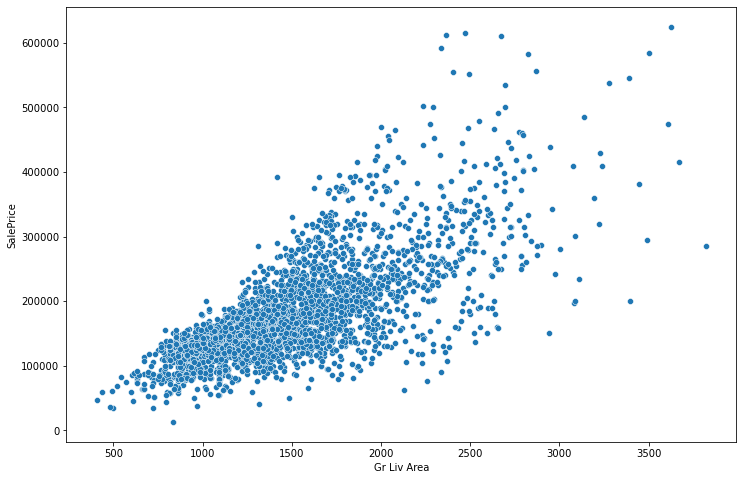

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

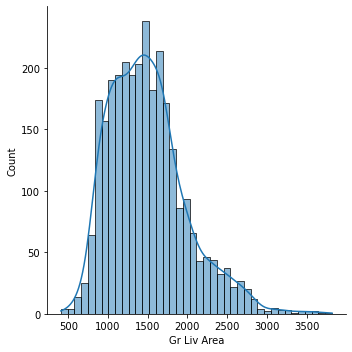

In [29]:
plt.figure(figsize=(15,15))
sns.displot(df['Gr Liv Area'],kde=True)
plt.show()

<AxesSubplot:xlabel='Gr Liv Area'>

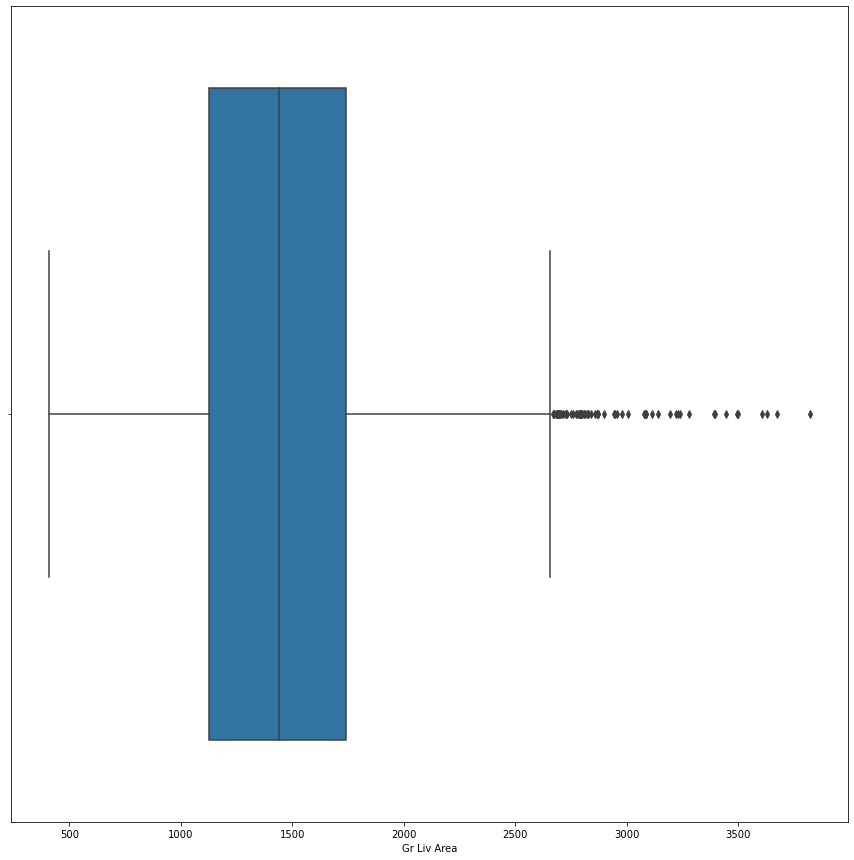

In [30]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Gr Liv Area',whis=1.5)

In [31]:
df[(df['Gr Liv Area']>3400)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1306,902207220,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700
1537,909282030,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
2445,528320060,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
2450,528360050,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,584500
2666,902400110,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
2737,905427030,75,RL,60.0,19800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,415000


In [32]:
df[(df['Gr Liv Area']>3400)].index

Int64Index([1306, 1497, 1537, 2445, 2450, 2666, 2737], dtype='int64')

In [33]:
df = df.drop(df[(df['Gr Liv Area']>3400)].index)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

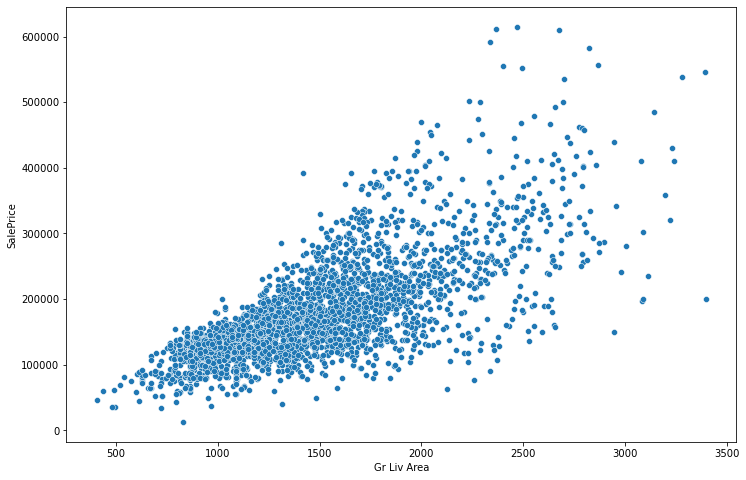

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Gr Liv Area'>

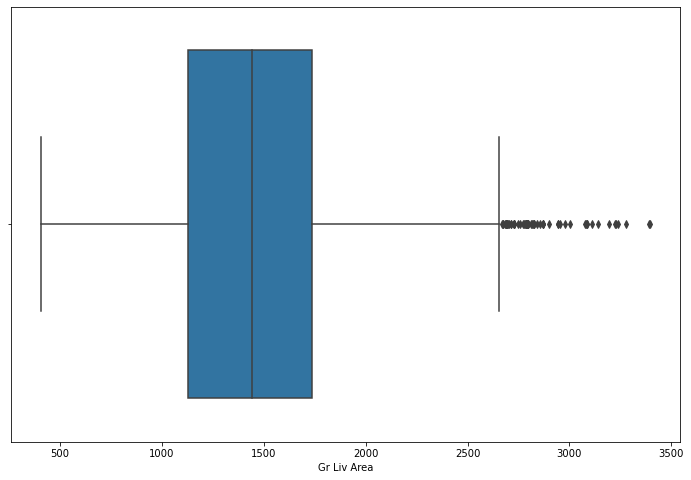

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x = 'Gr Liv Area',whis=1.5)

<Figure size 1080x1080 with 0 Axes>

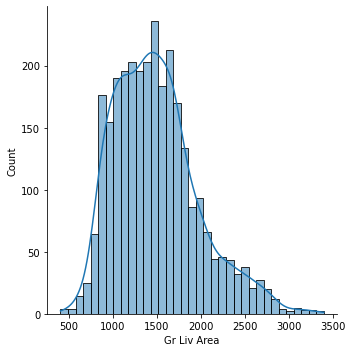

In [36]:
plt.figure(figsize=(15,15))
sns.displot(df['Gr Liv Area'],kde=True)
plt.show()

In [37]:
df.corr()['SalePrice'].sort_values()

PID               -0.250516
Enclosed Porch    -0.129358
Kitchen AbvGr     -0.121977
Overall Cond      -0.120816
MS SubClass       -0.091316
Low Qual Fin SF   -0.055536
Bsmt Half Bath    -0.045282
Yr Sold           -0.021008
Misc Val          -0.018995
BsmtFin SF 2      -0.005585
3Ssn Porch         0.034495
Mo Sold            0.036087
Pool Area          0.036463
Screen Porch       0.104122
Bedroom AbvGr      0.127497
Bsmt Unf SF        0.184632
2nd Flr SF         0.239490
Lot Area           0.263530
Half Bath          0.281618
Bsmt Full Bath     0.284749
Wood Deck SF       0.313902
Open Porch SF      0.320328
Lot Frontage       0.358136
BsmtFin SF 1       0.450671
Fireplaces         0.472550
TotRms AbvGrd      0.488948
Mas Vnr Area       0.506333
Full Bath          0.537506
Garage Yr Blt      0.538560
Year Remod/Add     0.543534
Year Built         0.580327
1st Flr SF         0.644746
Garage Area        0.646313
Garage Cars        0.653385
Total Bsmt SF      0.662105
Gr Liv Area        0

In [38]:
df['Garage Cars']

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
2925    2.0
2926    2.0
2927    0.0
2928    2.0
2929    3.0
Name: Garage Cars, Length: 2914, dtype: float64

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

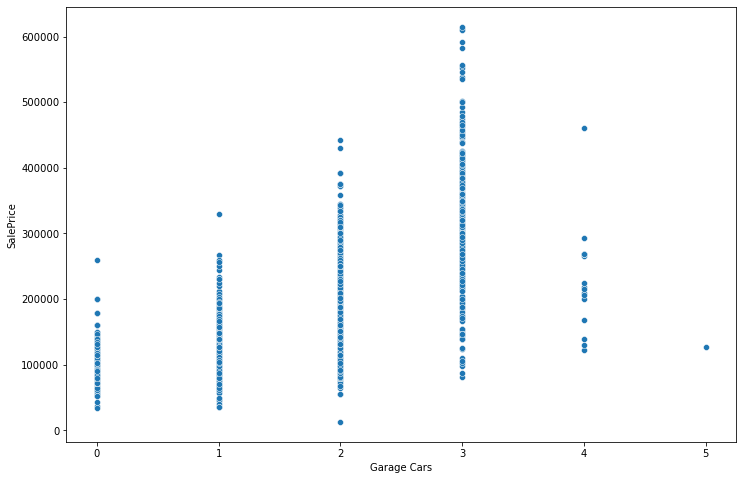

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Cars',y = 'SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

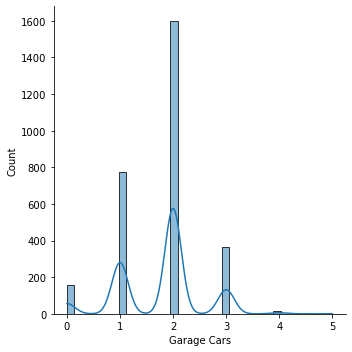

In [40]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Cars'],kde=True)

<AxesSubplot:xlabel='Garage Cars'>

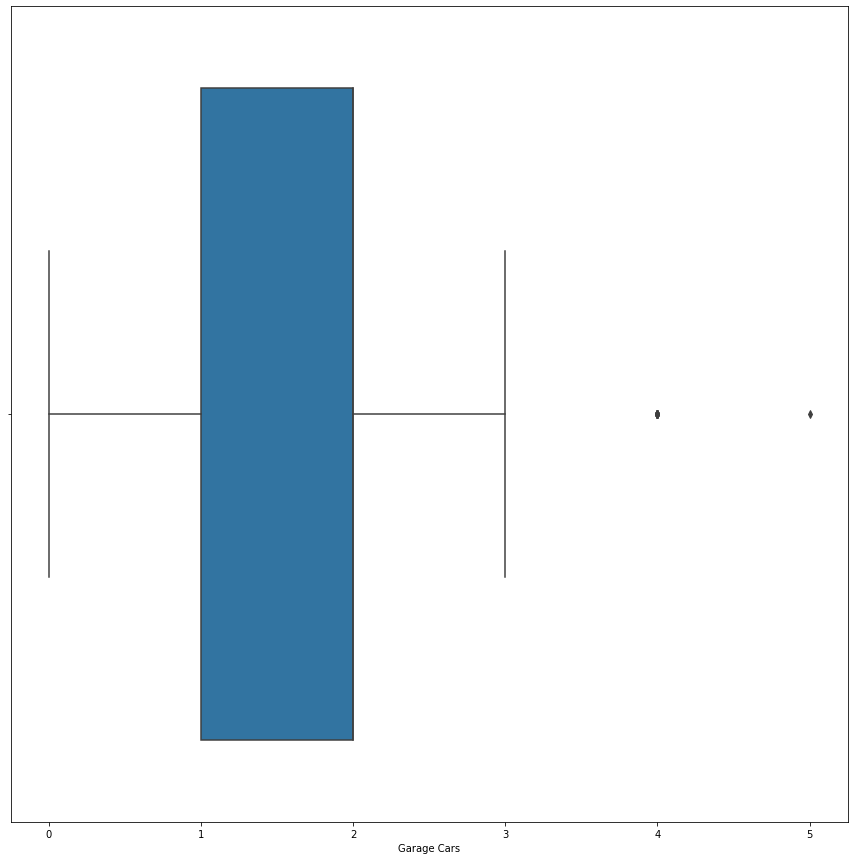

In [42]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df, x = 'Garage Cars', whis = 1.5)

In [41]:
df[(df['Garage Cars']>4)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
746,903236040,30,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,126500


In [47]:
df[(df['Garage Cars']>3)].index

Int64Index([ 246,  669,  716,  815,  816,  817, 1027, 1059, 1258, 1588, 1589,
            1668, 2278, 2282, 2749, 2904],
           dtype='int64')

In [48]:
df = df.drop(df[(df['Garage Cars']>3)].index)

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

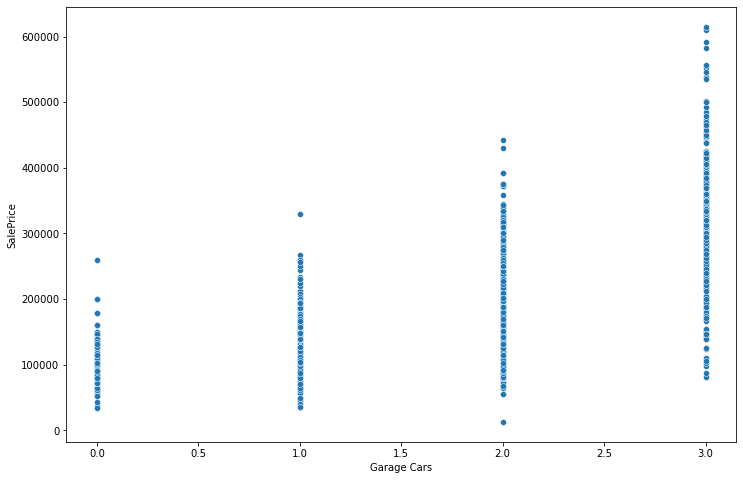

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Cars',y = 'SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

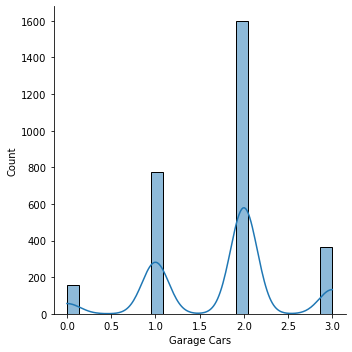

In [51]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Cars'],kde=True)

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

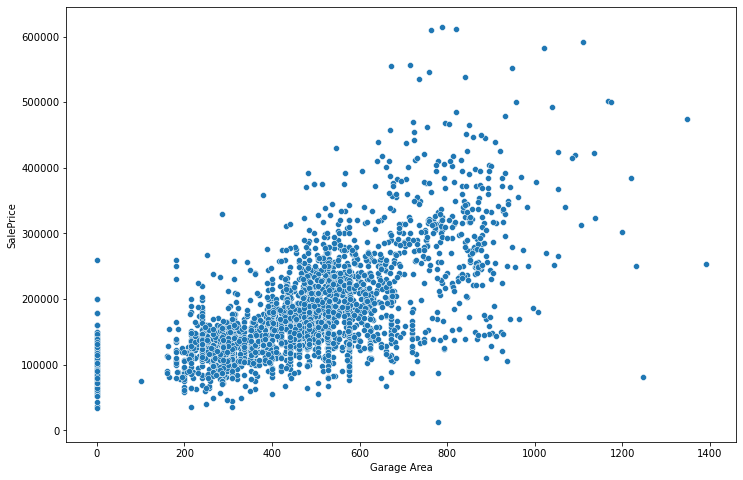

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area',y = 'SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

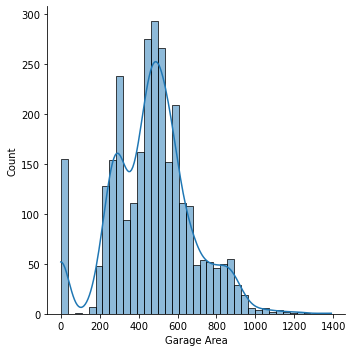

In [53]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Area'],kde=True)

<AxesSubplot:xlabel='Garage Area'>

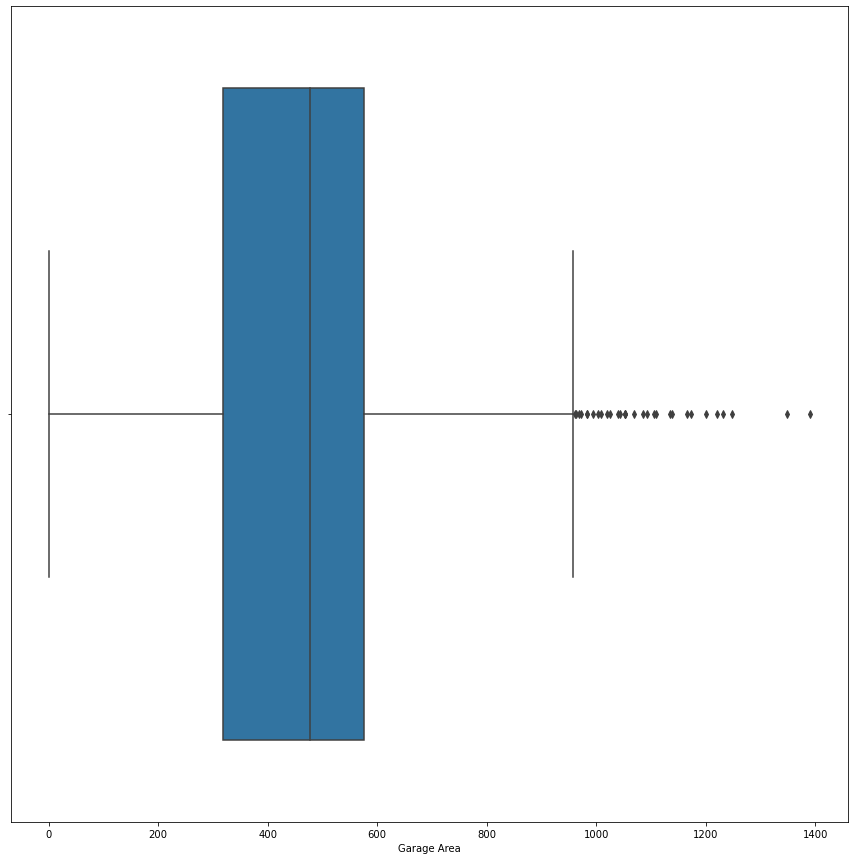

In [54]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df, x = 'Garage Area', whis = 1.5)

In [69]:
df[((df['Garage Area']>1200))]


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
426,528108020,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
862,907250070,20,RL,90.0,11664,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,250000
1052,528104050,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1425,906412010,20,RL,91.0,11778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,475000
1557,911226010,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


In [72]:
df[((df['Garage Area']>1200))].index

Int64Index([426, 862, 1052, 1425, 1557], dtype='int64')

In [70]:
df[((df['Garage Area']>600)&(df['SalePrice']>500000))]


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
44,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
366,527214050,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
423,528106020,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
432,528110020,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,610000
433,528110090,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
456,528176030,20,RL,100.0,14836,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Abnorml,552000
1063,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
1637,527216080,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,591587
1701,528118050,20,RL,59.0,17169,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,500067


In [73]:
df[((df['Garage Area']>600)&(df['SalePrice']>500000))].index

Int64Index([15, 44, 366, 423, 432, 433, 456, 1063, 1637, 1701, 2330, 2332,
            2334],
           dtype='int64')

In [74]:
df = df.drop(df[((df['Garage Area']>600)&(df['SalePrice']>500000))].index)

In [75]:
df = df.drop(df[((df['Garage Area']>1200))].index)

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

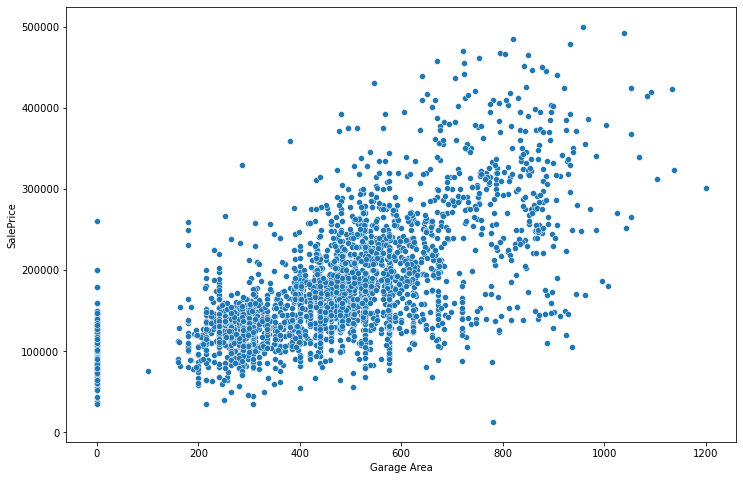

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area',y = 'SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

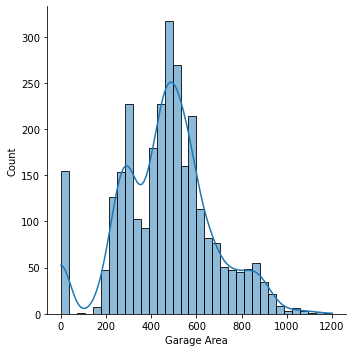

In [77]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Area'],kde=True)

<AxesSubplot:xlabel='Garage Area'>

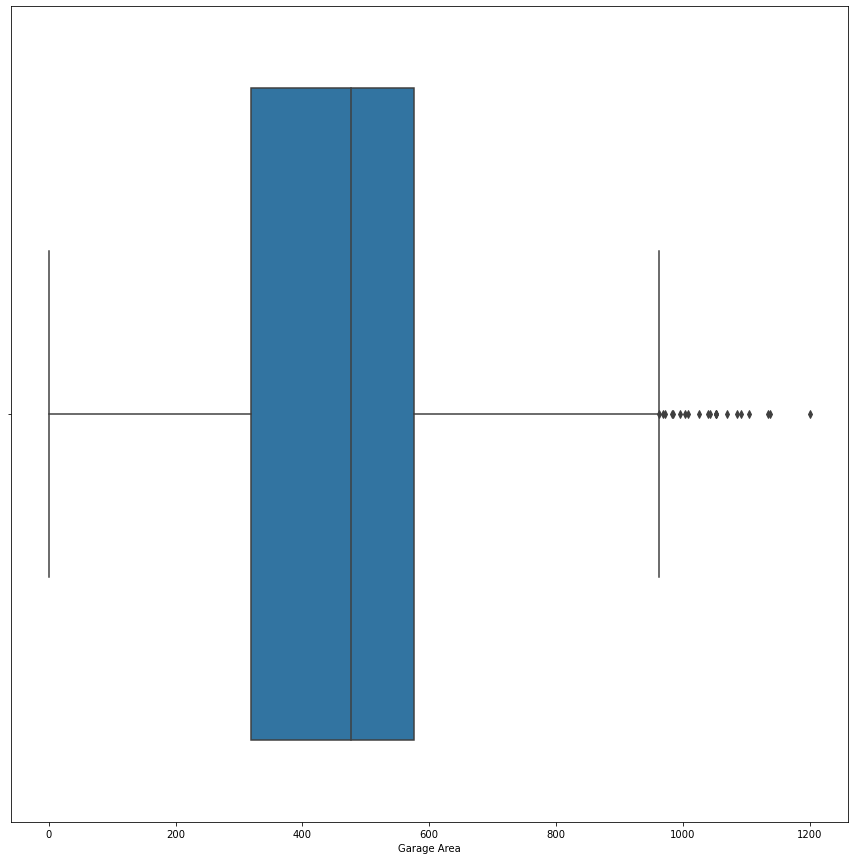

In [78]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df, x = 'Garage Area', whis = 1.5)

In [79]:
df.corr()['SalePrice'].sort_values()

PID               -0.246837
Kitchen AbvGr     -0.137923
Enclosed Porch    -0.131951
Overall Cond      -0.117602
MS SubClass       -0.085565
Low Qual Fin SF   -0.056455
Bsmt Half Bath    -0.044169
Yr Sold           -0.031170
Misc Val          -0.016935
BsmtFin SF 2      -0.004364
Pool Area          0.037570
3Ssn Porch         0.040018
Mo Sold            0.047722
Screen Porch       0.070218
Bedroom AbvGr      0.131097
Bsmt Unf SF        0.188968
2nd Flr SF         0.245026
Lot Area           0.252782
Bsmt Full Bath     0.274205
Half Bath          0.275618
Wood Deck SF       0.324466
Open Porch SF      0.331467
Lot Frontage       0.368304
BsmtFin SF 1       0.427711
Fireplaces         0.471353
Mas Vnr Area       0.475894
TotRms AbvGrd      0.476381
Full Bath          0.545657
Garage Yr Blt      0.547213
Year Remod/Add     0.551360
Year Built         0.591201
1st Flr SF         0.630230
Total Bsmt SF      0.646014
Garage Area        0.656314
Garage Cars        0.670283
Gr Liv Area        0

In [80]:
df['Total Bsmt SF']

0       1080.0
1        882.0
2       1329.0
3       2110.0
4        928.0
         ...  
2925    1003.0
2926     864.0
2927     912.0
2928    1389.0
2929     996.0
Name: Total Bsmt SF, Length: 2879, dtype: float64

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

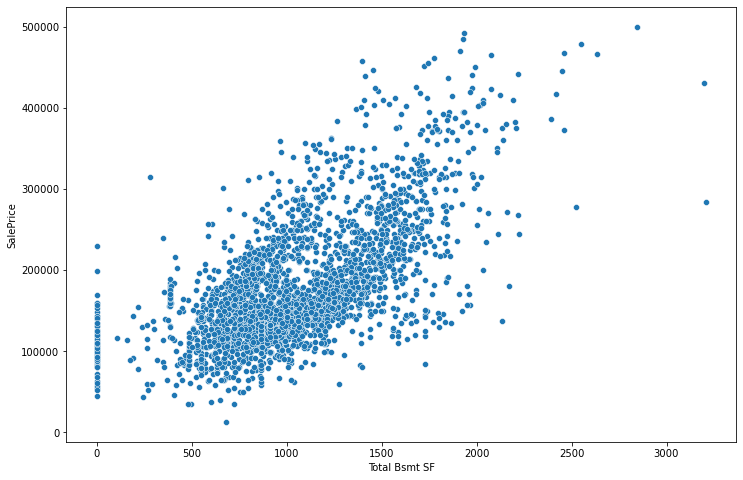

In [81]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

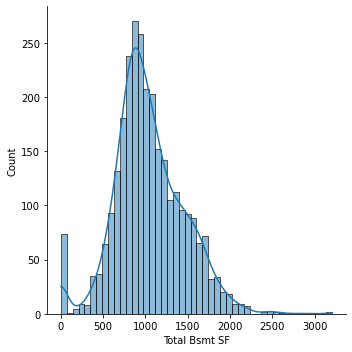

In [82]:
plt.figure(figsize=(15,15))
sns.displot(df['Total Bsmt SF'],kde=True)
plt.show()

<AxesSubplot:xlabel='Total Bsmt SF'>

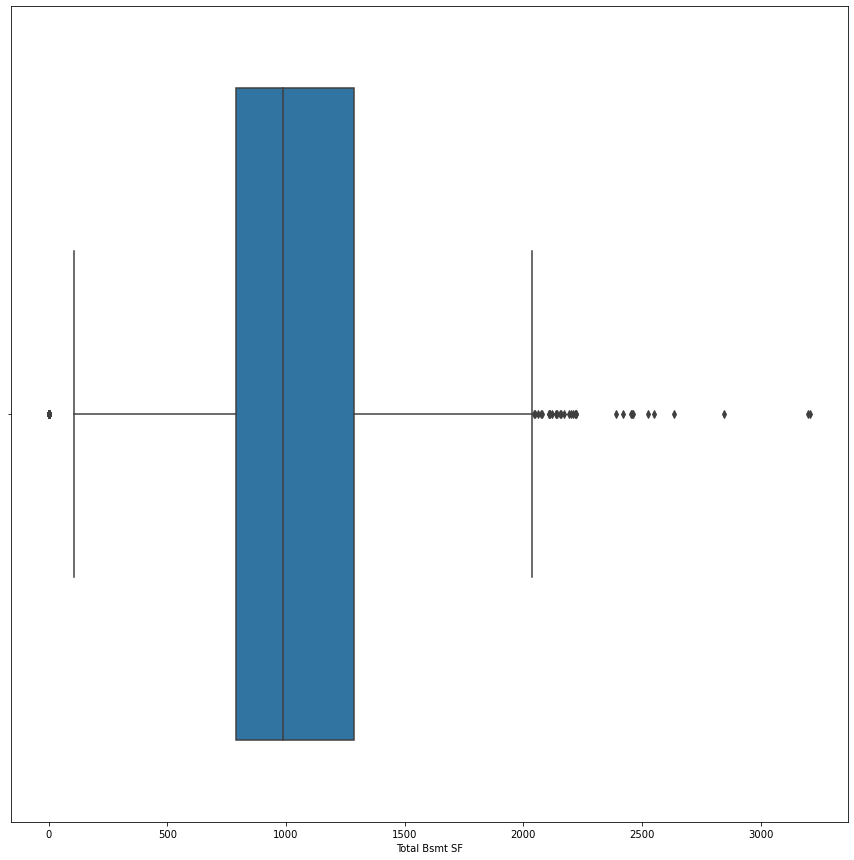

In [83]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Total Bsmt SF',whis=1.5)

In [91]:
df[(df['Total Bsmt SF']>2300)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
46,528176010,20,RL,110.0,14300,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,500000
379,527355150,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,278000
444,528142130,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
447,528166060,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
448,528166090,20,RL,110.0,15274,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,445000
513,528441090,20,RL,85.0,11128,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal,468000
1056,528110110,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,417500
1695,528110040,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,479069
1763,528327060,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1772,528366050,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000


In [92]:
df[(df['Total Bsmt SF']>2300)].index


Int64Index([46, 379, 444, 447, 448, 513, 1056, 1695, 1763, 1772, 1860], dtype='int64')

In [93]:
df = df.drop(df[(df['Total Bsmt SF']>2300)].index)

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

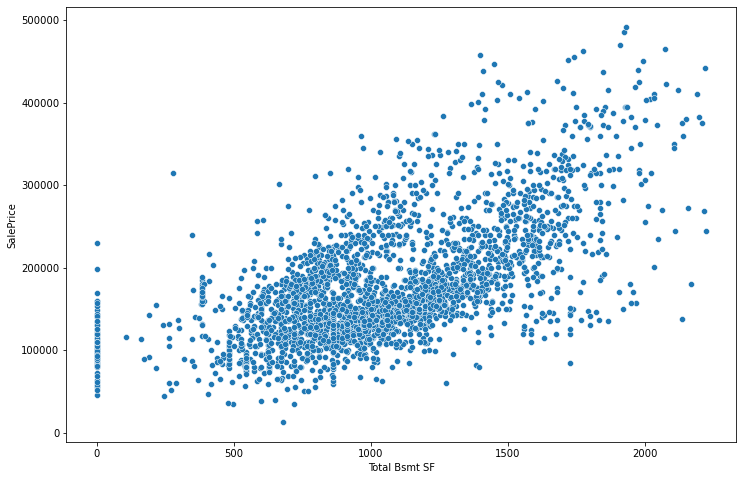

In [94]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF', y ='SalePrice',data=df)

In [97]:
df.corr()['SalePrice'].sort_values()

PID               -0.240401
Kitchen AbvGr     -0.138482
Enclosed Porch    -0.136417
Overall Cond      -0.113820
MS SubClass       -0.076538
Low Qual Fin SF   -0.056458
Bsmt Half Bath    -0.042049
Yr Sold           -0.036089
Misc Val          -0.016110
BsmtFin SF 2      -0.010520
Pool Area          0.039088
3Ssn Porch         0.042229
Mo Sold            0.046365
Screen Porch       0.075362
Bedroom AbvGr      0.133003
Bsmt Unf SF        0.181125
Lot Area           0.253078
2nd Flr SF         0.260794
Bsmt Full Bath     0.266729
Half Bath          0.282399
Wood Deck SF       0.321759
Open Porch SF      0.329129
Lot Frontage       0.360512
BsmtFin SF 1       0.411940
Mas Vnr Area       0.464159
Fireplaces         0.465336
TotRms AbvGrd      0.469778
Full Bath          0.546584
Garage Yr Blt      0.549290
Year Remod/Add     0.554458
Year Built         0.593364
1st Flr SF         0.613044
Total Bsmt SF      0.630996
Garage Area        0.653995
Garage Cars        0.670178
Gr Liv Area        0

In [98]:
df['1st Flr SF']

0       1656
1        896
2       1329
3       2110
4        928
        ... 
2925    1003
2926     902
2927     970
2928    1389
2929     996
Name: 1st Flr SF, Length: 2868, dtype: int64

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

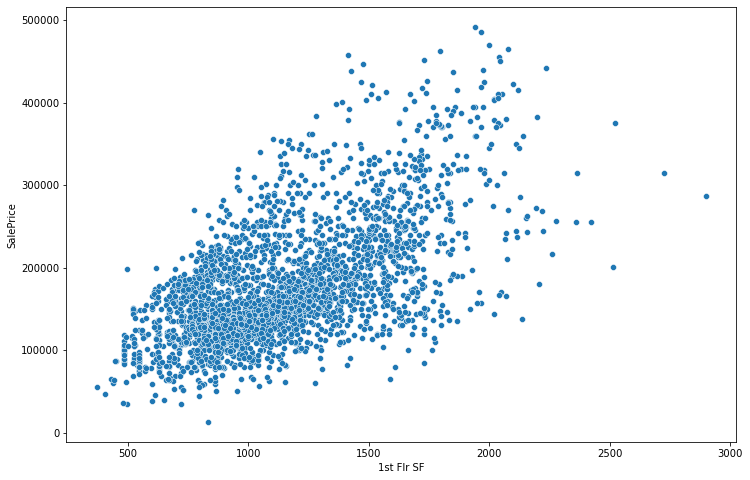

In [99]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st Flr SF', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

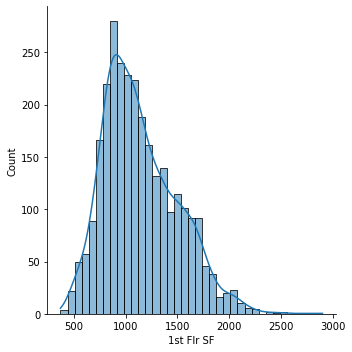

In [100]:
plt.figure(figsize=(15,15))
sns.displot(df['1st Flr SF'],kde=True)
plt.show()

<AxesSubplot:xlabel='1st Flr SF'>

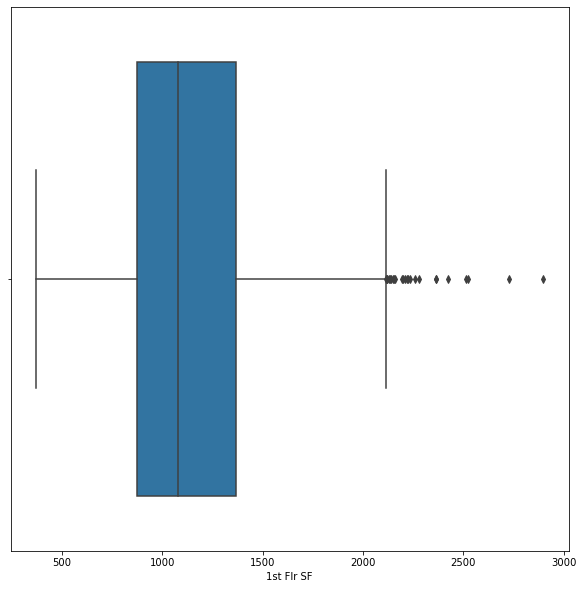

In [101]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x = '1st Flr SF', whis = 1.5)

In [102]:
df[df['1st Flr SF']>2500].index

Int64Index([349, 1572, 2229, 2230], dtype='int64')

In [103]:
df = df.drop(df[df['1st Flr SF']>2500].index)

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

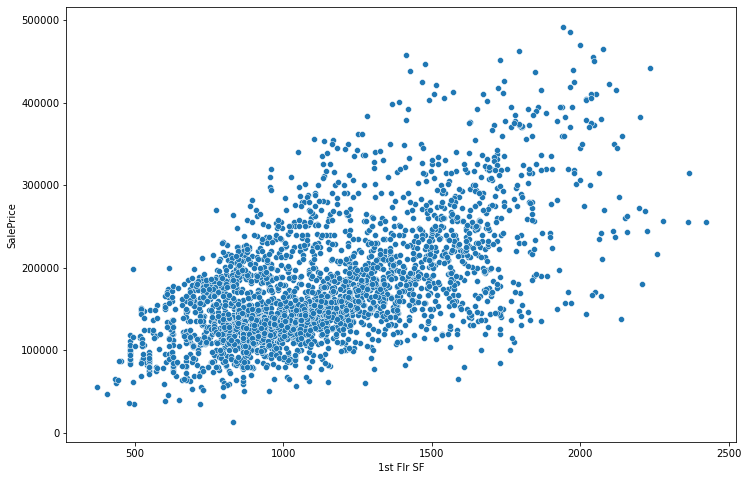

In [104]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st Flr SF', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

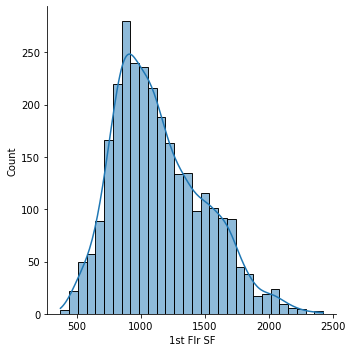

In [105]:
plt.figure(figsize=(15,15))
sns.displot(df['1st Flr SF'],kde=True)
plt.show()

<AxesSubplot:xlabel='1st Flr SF'>

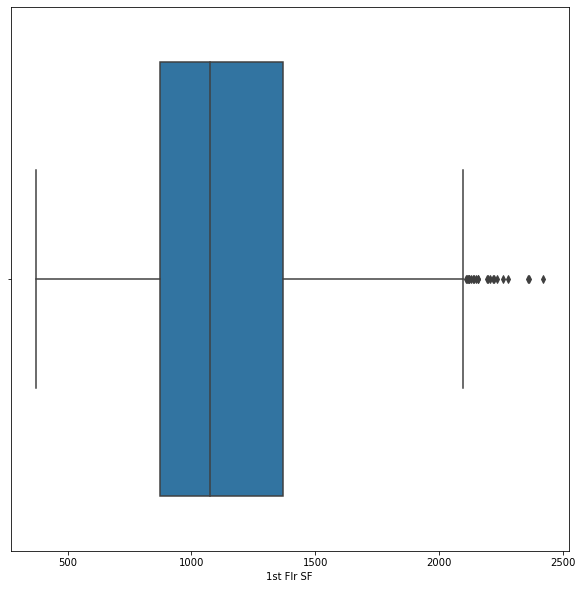

In [106]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x = '1st Flr SF', whis = 1.5)


In [107]:
df.corr()['SalePrice'].sort_values()

PID               -0.241599
Enclosed Porch    -0.139994
Kitchen AbvGr     -0.139419
Overall Cond      -0.113307
MS SubClass       -0.077028
Low Qual Fin SF   -0.056365
Bsmt Half Bath    -0.041583
Yr Sold           -0.036693
Misc Val          -0.015929
BsmtFin SF 2      -0.011174
Pool Area          0.034707
3Ssn Porch         0.042574
Mo Sold            0.044732
Screen Porch       0.076204
Bedroom AbvGr      0.136864
Bsmt Unf SF        0.183422
Lot Area           0.253051
2nd Flr SF         0.263378
Bsmt Full Bath     0.266316
Half Bath          0.283623
Wood Deck SF       0.321791
Open Porch SF      0.329527
Lot Frontage       0.363579
BsmtFin SF 1       0.410430
Fireplaces         0.465300
Mas Vnr Area       0.466669
TotRms AbvGrd      0.469395
Full Bath          0.546681
Garage Yr Blt      0.549561
Year Remod/Add     0.555171
Year Built         0.593563
1st Flr SF         0.612611
Total Bsmt SF      0.632196
Garage Area        0.654101
Garage Cars        0.671059
Gr Liv Area        0

In [108]:
df['Year Built']

0       1960
1       1961
2       1958
3       1968
4       1997
        ... 
2925    1984
2926    1983
2927    1992
2928    1974
2929    1993
Name: Year Built, Length: 2864, dtype: int64

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

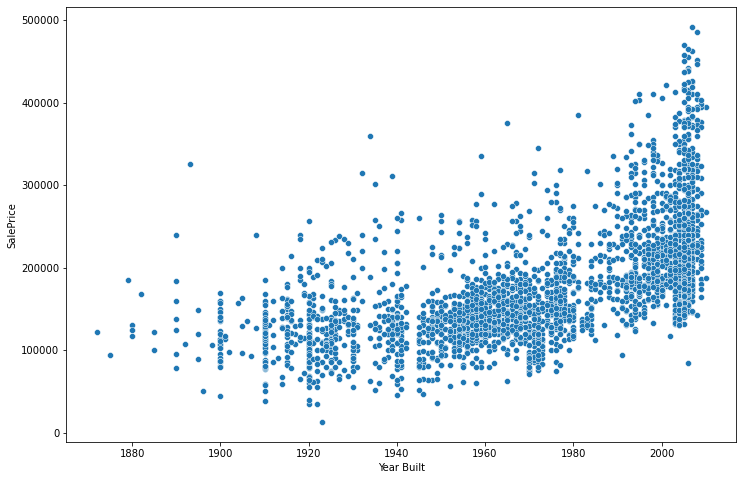

In [109]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

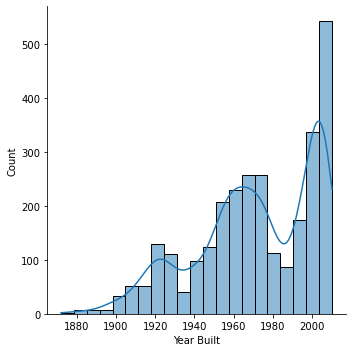

In [110]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Built'],kde=True)
plt.show()

In [111]:
df[(df['Year Built']<1940)&(df['SalePrice']>300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1320,902401120,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1538,909425010,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
1945,535355020,70,RL,113.0,21281,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Family,301600
2214,909276160,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Alloca,359100
2218,909281130,70,RL,70.0,10570,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,315000


In [112]:
df[(df['Year Built']<1940)&(df['SalePrice']>300000)].index

Int64Index([1320, 1538, 1945, 2214, 2218], dtype='int64')

In [113]:
df = df.drop(df[(df['Year Built']<1940)&(df['SalePrice']>300000)].index)

<Figure size 1080x1080 with 0 Axes>

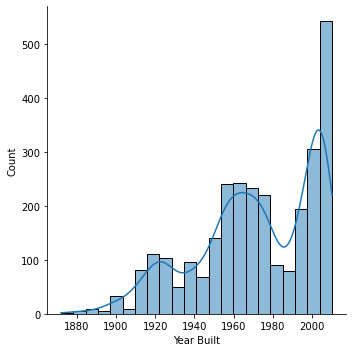

In [114]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Built'],kde=True)
plt.show()

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

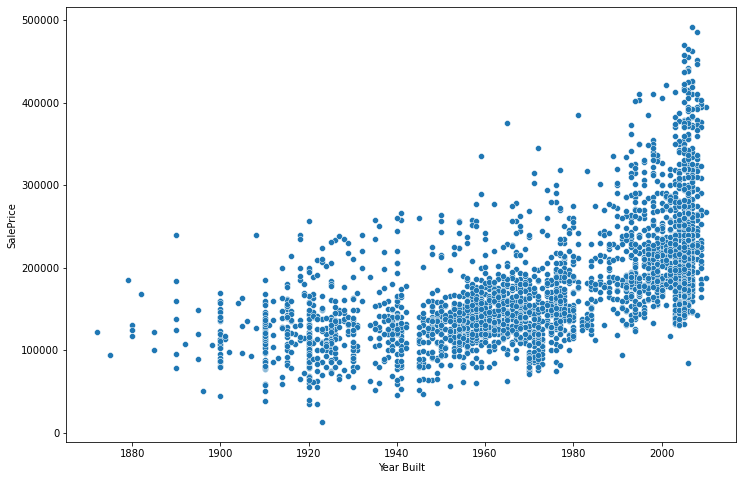

In [115]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built', y ='SalePrice',data=df)

In [116]:
df[(df['Year Built']<1900)&(df['SalePrice']>200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
185,902329030,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,240000


In [117]:
df[(df['Year Built']<1900)&(df['SalePrice']>200000)].index

Int64Index([185], dtype='int64')

In [118]:
df = df.drop(df[(df['Year Built']<1900)&(df['SalePrice']>200000)].index)

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

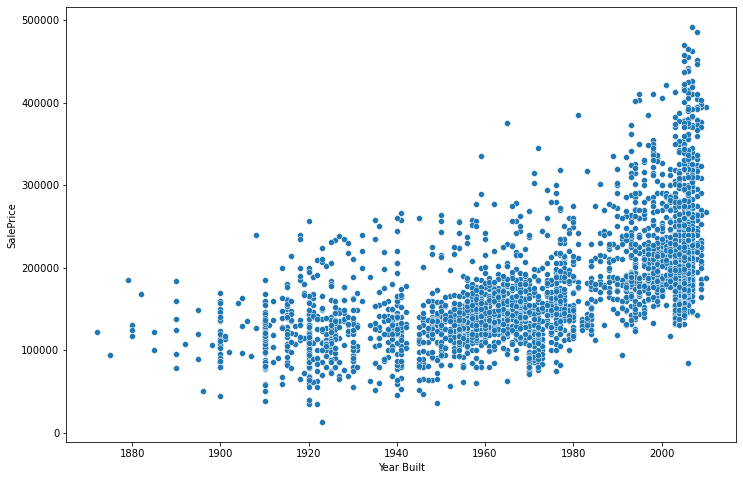

In [119]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

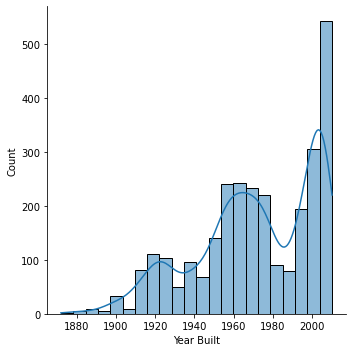

In [120]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Built'],kde=True)
plt.show()

In [121]:
df.corr()['SalePrice'].sort_values()

PID               -0.245574
Enclosed Porch    -0.144049
Kitchen AbvGr     -0.139181
Overall Cond      -0.120793
MS SubClass       -0.078239
Low Qual Fin SF   -0.056193
Bsmt Half Bath    -0.043621
Yr Sold           -0.036295
Misc Val          -0.015616
BsmtFin SF 2      -0.010066
Pool Area          0.035044
Mo Sold            0.041840
3Ssn Porch         0.043149
Screen Porch       0.075948
Bedroom AbvGr      0.134904
Bsmt Unf SF        0.183275
Lot Area           0.252152
2nd Flr SF         0.257309
Bsmt Full Bath     0.270745
Half Bath          0.280859
Wood Deck SF       0.325484
Open Porch SF      0.326821
Lot Frontage       0.363442
BsmtFin SF 1       0.414297
Fireplaces         0.463880
TotRms AbvGrd      0.465825
Mas Vnr Area       0.469822
Full Bath          0.546025
Year Remod/Add     0.554624
Garage Yr Blt      0.555426
Year Built         0.604157
1st Flr SF         0.611904
Total Bsmt SF      0.636787
Garage Area        0.655307
Garage Cars        0.671866
Gr Liv Area        0

In [122]:
df['Full Bath']

0       1
1       1
2       1
3       2
4       2
       ..
2925    1
2926    1
2927    1
2928    1
2929    2
Name: Full Bath, Length: 2858, dtype: int64

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

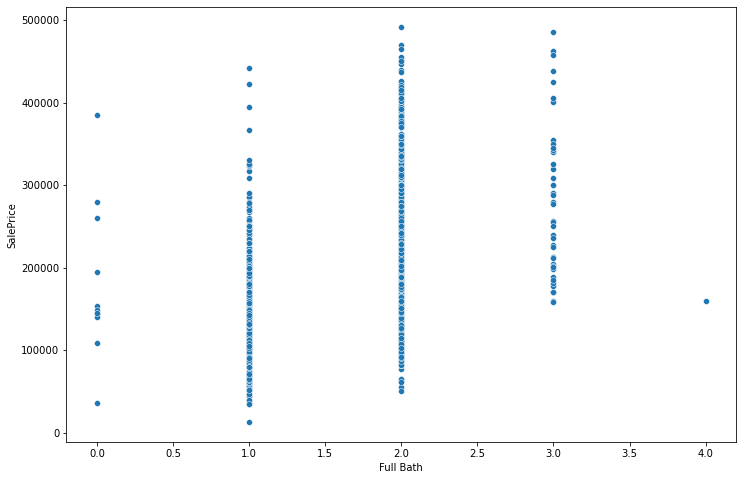

In [123]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Full Bath', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

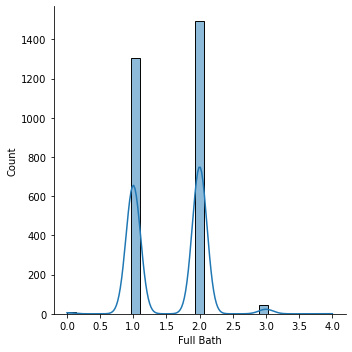

In [125]:
plt.figure(figsize=(15,15))
sns.displot(df['Full Bath'],kde=True)
plt.show()

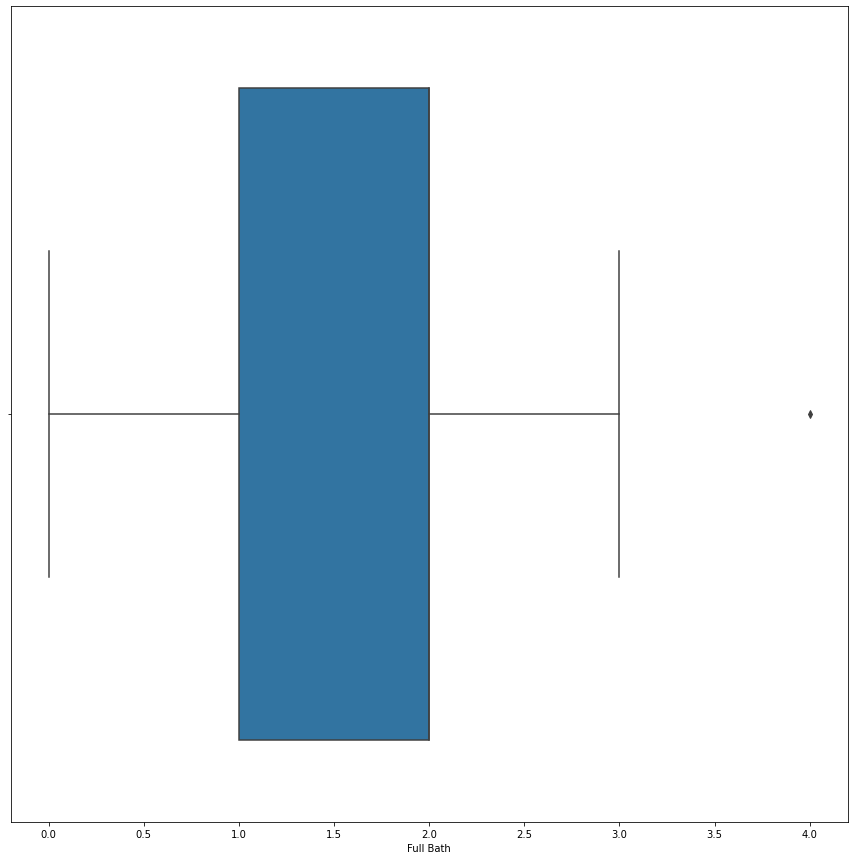

In [126]:
plt.figure(figsize=(15,15))
sns.boxplot(data = df, x = 'Full Bath', whis = 1.5)
plt.show()

In [128]:
df[(df['Full Bath']>3.5)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
336,923276250,90,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,600,2,2010,WD,Normal,159000


In [129]:
df[(df['Full Bath']>3.5)].index

Int64Index([336], dtype='int64')

In [130]:
df = df.drop(df[(df['Full Bath']>3.5)].index)

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

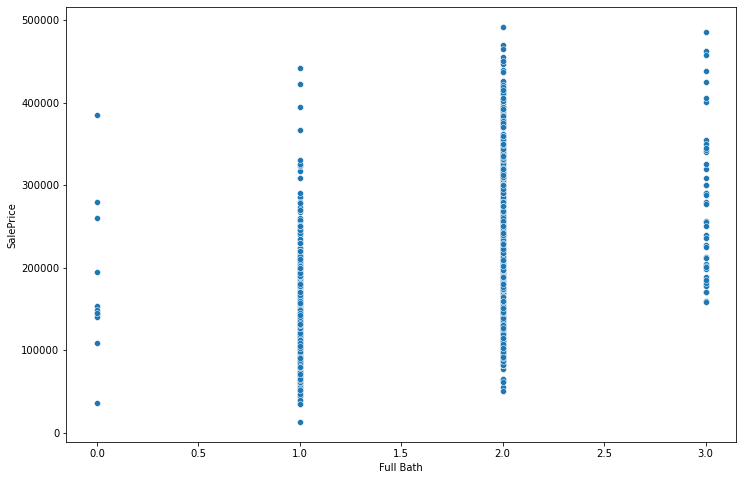

In [131]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Full Bath', y ='SalePrice',data=df)

In [132]:
df['Year Remod/Add']

0       1960
1       1961
2       1958
3       1968
4       1998
        ... 
2925    1984
2926    1983
2927    1992
2928    1975
2929    1994
Name: Year Remod/Add, Length: 2857, dtype: int64

<Figure size 1080x1080 with 0 Axes>

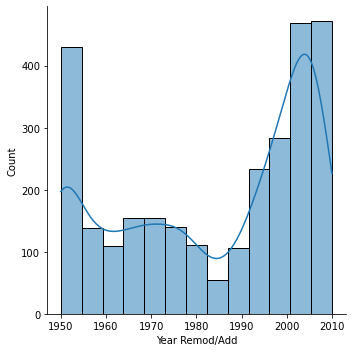

In [133]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Remod/Add'],kde=True)
plt.show()

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

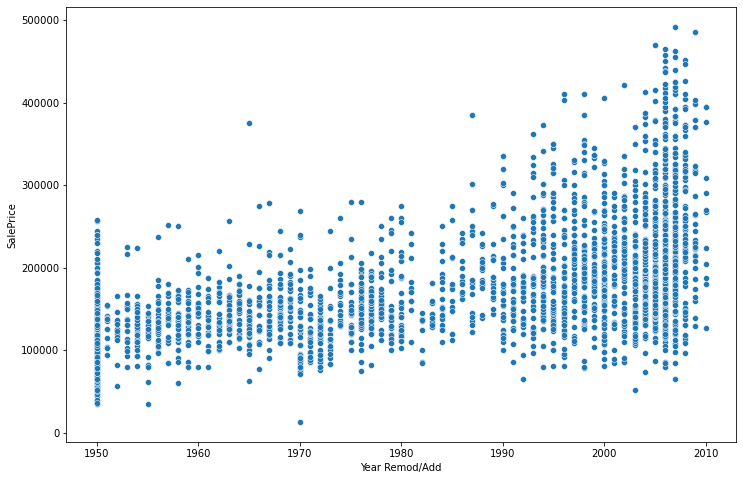

In [134]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add', y ='SalePrice',data=df)

In [139]:
df[((df['Year Remod/Add']>1960)&(df['Year Remod/Add']<1990))&(df['SalePrice']>300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
956,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
2092,906201200,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000
2522,533350050,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


In [140]:
df[((df['Year Remod/Add']>1960)&(df['Year Remod/Add']<1990))&(df['SalePrice']>300000)].index

Int64Index([956, 2092, 2522], dtype='int64')

In [141]:
df = df.drop(df[((df['Year Remod/Add']>1960)&(df['Year Remod/Add']<1990))&(df['SalePrice']>300000)].index)

<AxesSubplot:xlabel='Year Remod/Add'>

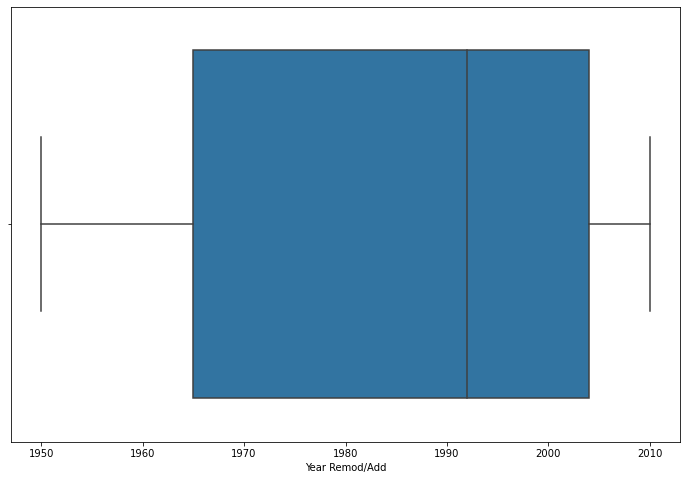

In [142]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year Remod/Add',whis=1.5,data=df)

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

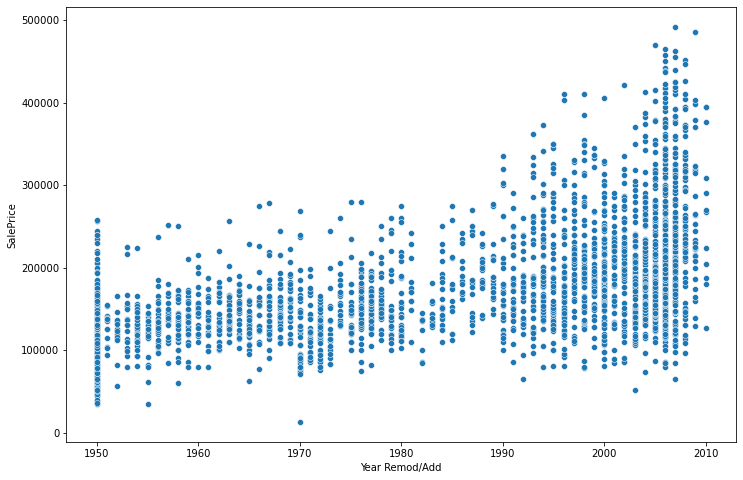

In [143]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

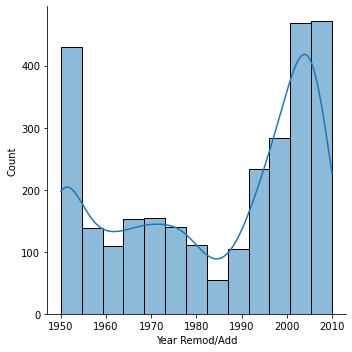

In [144]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Remod/Add'],kde=True)
plt.show()

In [145]:
df.corr()['SalePrice'].sort_values()

PID               -0.247202
Enclosed Porch    -0.143646
Kitchen AbvGr     -0.139251
Overall Cond      -0.120369
MS SubClass       -0.076734
Low Qual Fin SF   -0.056131
Bsmt Half Bath    -0.043143
Yr Sold           -0.035447
BsmtFin SF 2      -0.019991
Misc Val          -0.015322
Pool Area          0.035297
Mo Sold            0.039729
3Ssn Porch         0.043565
Screen Porch       0.076935
Bedroom AbvGr      0.138445
Bsmt Unf SF        0.187374
Lot Area           0.257312
2nd Flr SF         0.259172
Bsmt Full Bath     0.265709
Half Bath          0.281477
Wood Deck SF       0.322762
Open Porch SF      0.327820
Lot Frontage       0.361227
BsmtFin SF 1       0.412138
Fireplaces         0.462682
TotRms AbvGrd      0.467604
Mas Vnr Area       0.472420
Full Bath          0.552905
Year Remod/Add     0.557300
Garage Yr Blt      0.557635
Year Built         0.605912
1st Flr SF         0.610005
Total Bsmt SF      0.634963
Garage Area        0.655489
Garage Cars        0.672263
Gr Liv Area        0

In [146]:
df['Garage Yr Blt']


0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2925    1984.0
2926    1983.0
2927       NaN
2928    1975.0
2929    1993.0
Name: Garage Yr Blt, Length: 2854, dtype: float64

<Figure size 1080x1080 with 0 Axes>

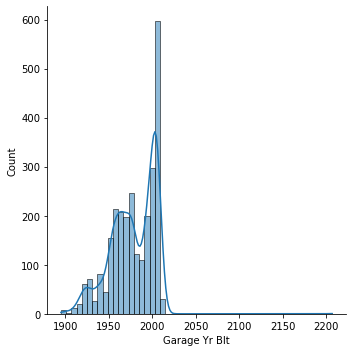

In [147]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Yr Blt'],kde=True)
plt.show()

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

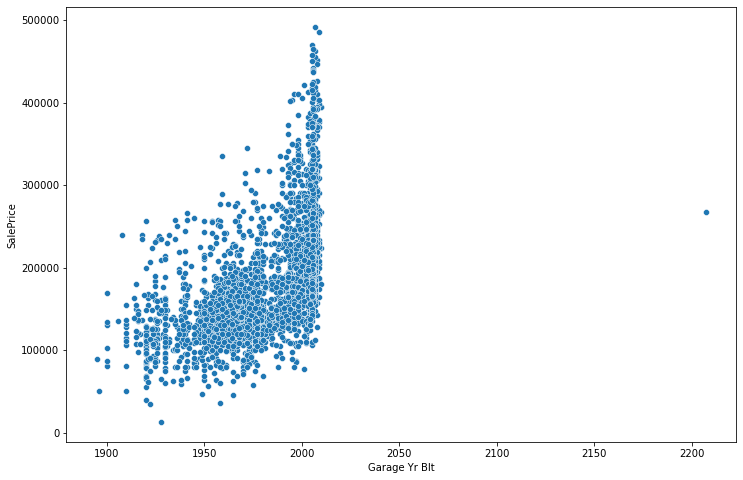

In [148]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Yr Blt'>

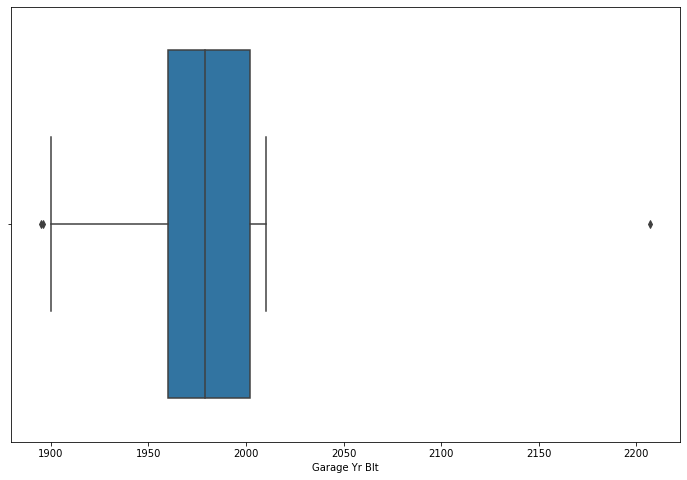

In [150]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Garage Yr Blt',whis=1.5,data=df)

In [154]:
df[(df['Garage Yr Blt']<1900)|(df['Garage Yr Blt']>2050)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
307,911204100,30,C (all),66.0,8712,Grvl,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Alloca,50138
1554,911102090,70,C (all),60.0,5280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,89000
2260,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,267300


In [155]:
df[(df['Garage Yr Blt']<1900)|(df['Garage Yr Blt']>2050)].index

Int64Index([307, 1554, 2260], dtype='int64')

In [156]:
df = df.drop(df[(df['Garage Yr Blt']<1900)|(df['Garage Yr Blt']>2050)].index)

<Figure size 1080x1080 with 0 Axes>

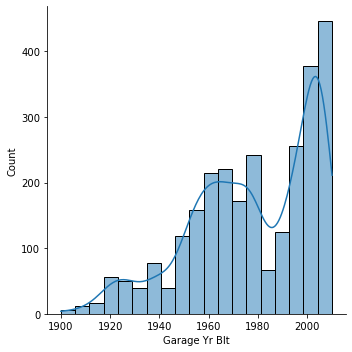

In [157]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Yr Blt'],kde=True)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.distplot(df['Garage Yr Blt'],kde=True)
plt.show()

<AxesSubplot:xlabel='Garage Yr Blt'>

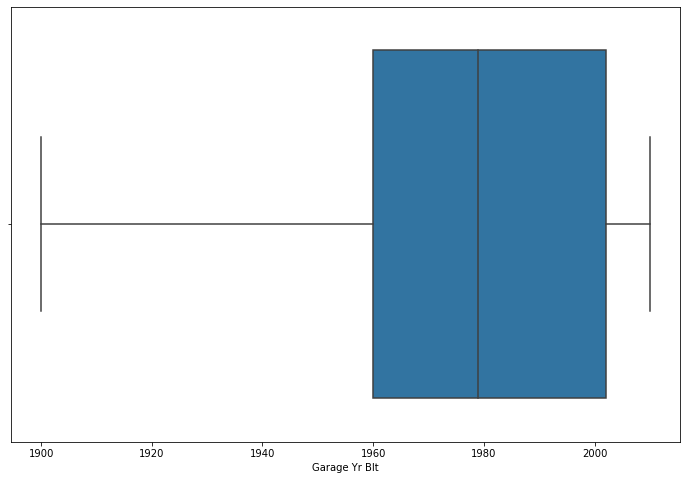

In [158]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Garage Yr Blt', data = df, whis = 1.5 )

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

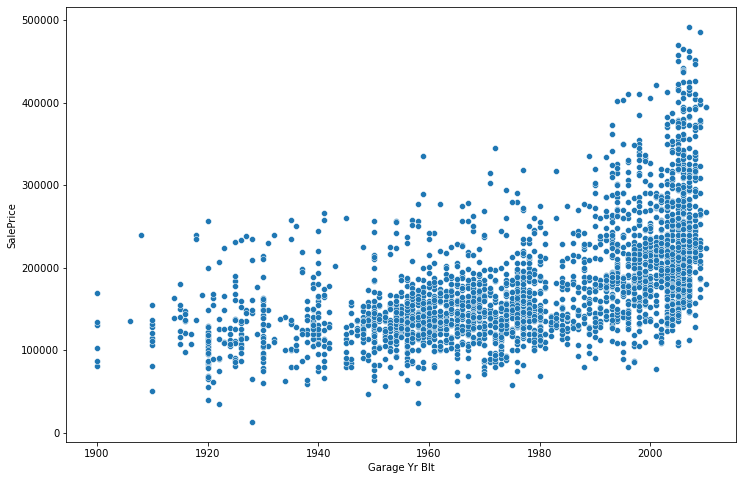

In [160]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt', y ='SalePrice',data=df)

In [162]:
df.corr()['SalePrice'].sort_values()

PID               -0.247000
Enclosed Porch    -0.141788
Kitchen AbvGr     -0.139532
Overall Cond      -0.118965
MS SubClass       -0.076719
Low Qual Fin SF   -0.056255
Bsmt Half Bath    -0.043344
Yr Sold           -0.034117
BsmtFin SF 2      -0.020194
Misc Val          -0.015397
Pool Area          0.035305
Mo Sold            0.039394
3Ssn Porch         0.043551
Screen Porch       0.076852
Bedroom AbvGr      0.138790
Bsmt Unf SF        0.187127
Lot Area           0.257321
2nd Flr SF         0.259607
Bsmt Full Bath     0.265601
Half Bath          0.281420
Wood Deck SF       0.322254
Open Porch SF      0.328704
Lot Frontage       0.361427
BsmtFin SF 1       0.411515
Fireplaces         0.462104
TotRms AbvGrd      0.467637
Mas Vnr Area       0.472255
Full Bath          0.552327
Year Remod/Add     0.556336
Garage Yr Blt      0.561037
Year Built         0.604889
1st Flr SF         0.609692
Total Bsmt SF      0.634475
Garage Area        0.655401
Garage Cars        0.672041
Gr Liv Area        0

In [163]:
df['Mas Vnr Area']

0       112.0
1         0.0
2       108.0
3         0.0
4         0.0
        ...  
2925      0.0
2926      0.0
2927      0.0
2928      0.0
2929     94.0
Name: Mas Vnr Area, Length: 2851, dtype: float64

<Figure size 1080x1080 with 0 Axes>

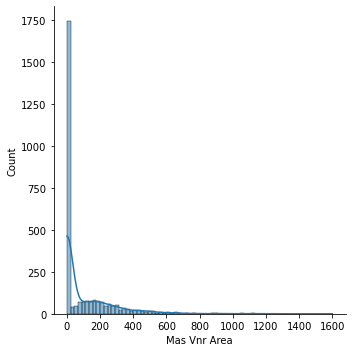

In [165]:
plt.figure(figsize=(15,15))
sns.displot(df['Mas Vnr Area'],kde=True)
plt.show()

<AxesSubplot:xlabel='Mas Vnr Area', ylabel='SalePrice'>

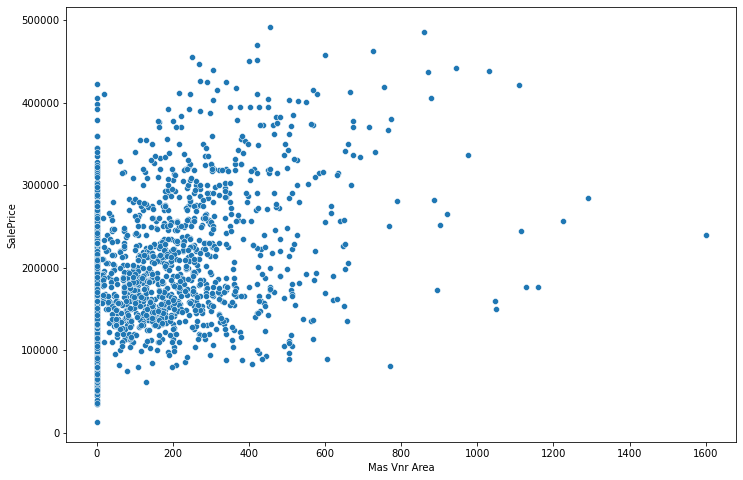

In [166]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Mas Vnr Area', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Mas Vnr Area'>

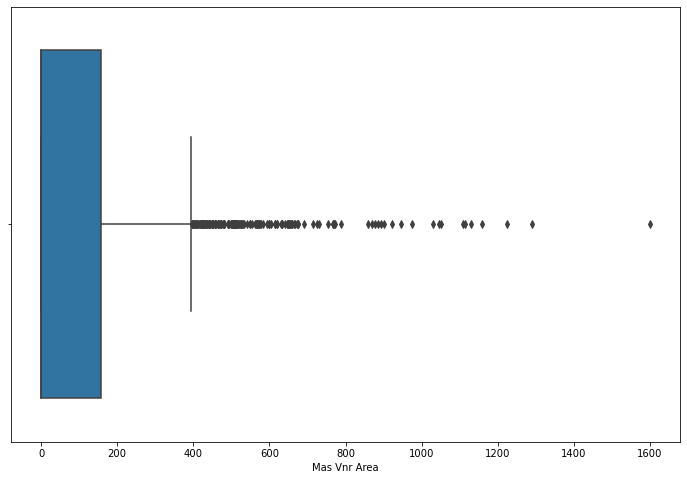

In [168]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Mas Vnr Area',whis=1.5,data=df)

In [171]:
df[(df['Mas Vnr Area']>1200)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1098,528315060,75,RL,84.0,9660,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,284500
1849,533241030,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
2258,916326090,20,RL,149.0,19958,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,257000


In [172]:
df[(df['Mas Vnr Area']>1200)].index

Int64Index([1098, 1849, 2258], dtype='int64')

In [173]:
df = df.drop(df[(df['Mas Vnr Area']>1200)].index)

<Figure size 1080x1080 with 0 Axes>

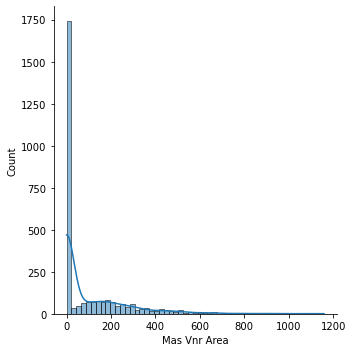

In [174]:
plt.figure(figsize=(15,15))
sns.displot(df['Mas Vnr Area'],kde=True)
plt.show()

In [175]:
df[(df['Mas Vnr Area']>800)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
101,533221110,160,FV,NaN,2980,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,177000
422,528104070,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
498,528344100,60,RL,98.0,12203,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,336000
499,528354050,60,RL,79.0,10208,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,265000
570,533213040,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,172500
1067,528178070,60,RL,130.0,16900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,421250
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1613,526355170,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
1641,527256030,20,RL,85.0,14082,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,441929
1843,533213140,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,176000


In [178]:
df = df.drop(df[(df['Mas Vnr Area']>800)].index)

<Figure size 1080x1080 with 0 Axes>

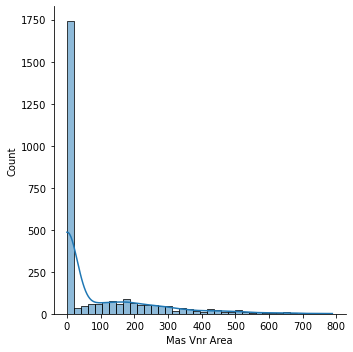

In [179]:
plt.figure(figsize=(15,15))
sns.displot(df['Mas Vnr Area'],kde=True)
plt.show()

<AxesSubplot:xlabel='Mas Vnr Area', ylabel='SalePrice'>

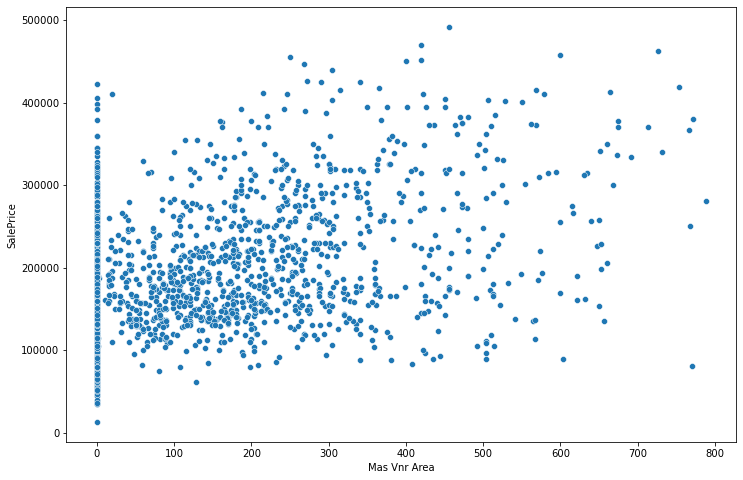

In [180]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Mas Vnr Area', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Mas Vnr Area'>

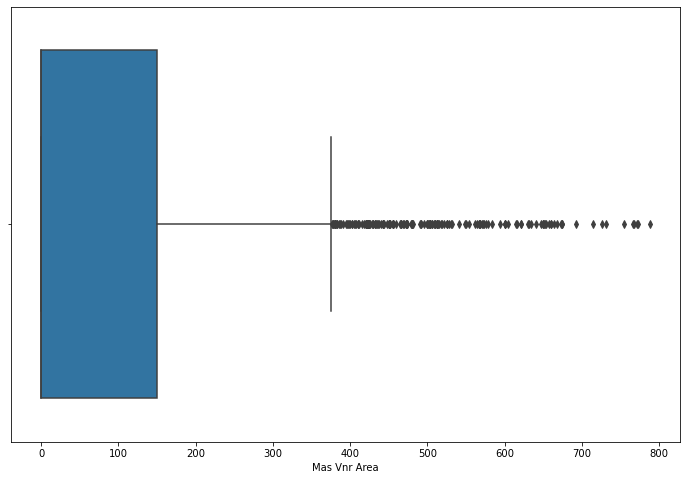

In [181]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Mas Vnr Area',whis=1.5,data=df)

In [182]:
df.to_csv('Project_freeoutlier_data.csv',index=False)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2832 non-null   int64  
 1   MS SubClass      2832 non-null   int64  
 2   MS Zoning        2832 non-null   object 
 3   Lot Frontage     2358 non-null   float64
 4   Lot Area         2832 non-null   int64  
 5   Street           2832 non-null   object 
 6   Alley            192 non-null    object 
 7   Lot Shape        2832 non-null   object 
 8   Land Contour     2832 non-null   object 
 9   Utilities        2832 non-null   object 
 10  Lot Config       2832 non-null   object 
 11  Land Slope       2832 non-null   object 
 12  Neighborhood     2832 non-null   object 
 13  Condition 1      2832 non-null   object 
 14  Condition 2      2832 non-null   object 
 15  Bldg Type        2832 non-null   object 
 16  House Style      2832 non-null   object 
 17  Overall Qual  